# Download dataset

In [1]:
! gdown 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 24.2MB/s]


# Data processing and EDA

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


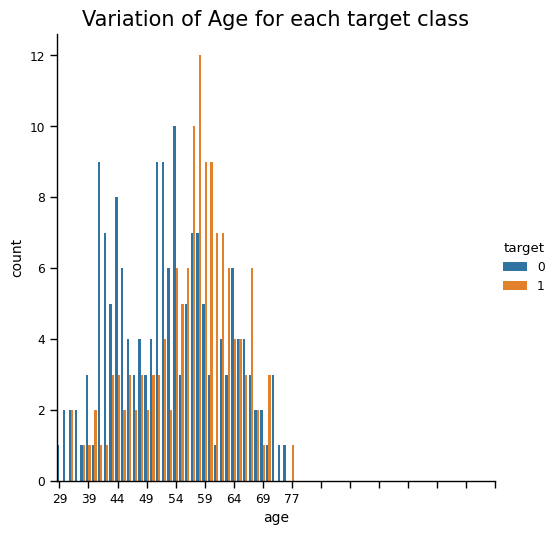

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bài tập 1
df = pd.read_csv('cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
sns.set_context("paper", font_scale = 1, rc = {"font.size": 3,"axes.titlesize": 15,"axes.labelsize": 10})
ax = sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())

# ax.set(xticklabels=[])
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


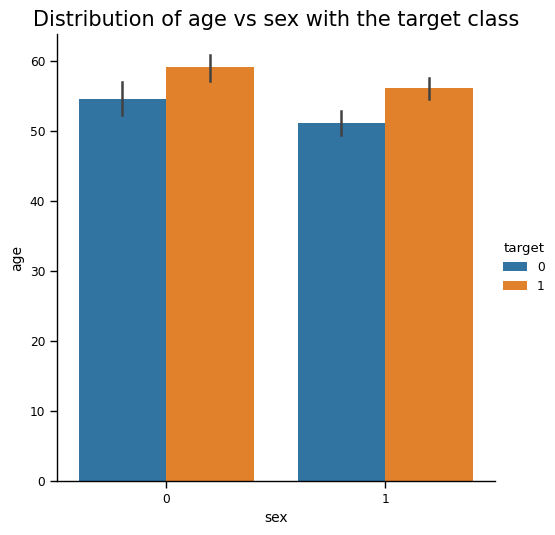

In [5]:
# bai tap 2
#barplot of age vs sex with the target class
sns.catplot(kind='bar', data = df, y = 'age',x = 'sex',hue= 'target')
plt.title("Distribution of age vs sex with the target class")
plt.show()


# Model

## KNN

In [20]:
#########################################   KNN  #############################################################

# Bài tập 3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Tách dữ liệu
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test)

# Tính toán ma trận nhầm lẫn cho tập huấn luyện và tập kiểm tra
cm_train = confusion_matrix(y_train, knn.predict(X_train))
cm_test = confusion_matrix(y_test, y_pred)

# Tính độ chính xác cho tập huấn luyện và tập kiểm tra sử dụng ma trận nhầm lẫn
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Độ chính xác cho tập huấn luyện của KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Độ chính xác cho tập kiểm tra của KNeighborsClassifier = {}'.format(accuracy_for_test))


Độ chính xác cho tập huấn luyện của KNeighborsClassifier = 0.89
Độ chính xác cho tập kiểm tra của KNeighborsClassifier = 0.92


## SVM

In [9]:
#########################################   SVM  #############################################################

# Bài tập 4: Dự đoán bệnh tim sử dụng SVM

# Import các thư viện cần thiết
from sklearn.svm import SVC

# Khởi tạo mô hình SVM với kernel RBF
svm_model = SVC(kernel='rbf', random_state=42)

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác (accuracy) cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))


Accuracy for training set for SVM = 0.9
Accuracy for test set for SVM = 0.9


## Naive Bayes

In [8]:
#########################################   Naive Bayes  #############################################################
# Bài tập 5

# Import các thư viện cần thiết
from sklearn.naive_bayes import GaussianNB

# Khởi tạo mô hình Naive Bayes
nb_model = GaussianNB()

# Huấn luyện mô hình
nb_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác (accuracy) cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))


Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


## Decision Tree

In [10]:
#########################################   Decision Tree  #############################################################
# Bài tập 6

# Import các thư viện cần thiết
from sklearn.tree import DecisionTreeClassifier

# Khởi tạo mô hình Decision Tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

# Huấn luyện mô hình
dt_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác (accuracy) cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.75


## Random Forest

In [11]:
#########################################   Random Forest  #############################################################
# Bài tập 7

# Import các thư viện cần thiết
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2,
                                  n_estimators=10, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác (accuracy) cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


## AdaBoost

In [15]:
#########################################   AdaBoost  #############################################################
# Bài tập 8

# Import các thư viện cần thiết
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Khởi tạo mô hình AdaBoost
ada_model = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Huấn luyện mô hình
ada_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác (accuracy) cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Gradient Boosting

In [16]:
#########################################   Gradient Boosting  #############################################################
# Bài tập 9

# Import các thư viện cần thiết
from sklearn.ensemble import GradientBoostingClassifier

# Khởi tạo mô hình Gradient Boosting
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    min_samples_split=2,
    max_depth=3,
    random_state=42
)

# Huấn luyện mô hình
gb_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác (accuracy) cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


## XGBoost

In [21]:
#########################################   XGBoost  #############################################################
# Bài tập 10

# Import các thư viện cần thiết
import xgboost as xgb

# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    random_state=42,
    n_estimators=100
)

# Huấn luyện mô hình
xgb_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác (accuracy) cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for XGBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for XGBoostClassifier = 1.0
Accuracy for test set for XGBoostClassifier = 0.87


## Stacking với XGBoost làm mô hình cuối

In [19]:
#########################################   Stacking với XGBoost làm mô hình cuối  #############################################################
# Bài tập 10

# Import các thư viện cần thiết
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

# Tạo mô hình Stacking với XGBoost làm mô hình cuối
estimators = [
    ('decision_tree', dtc),
    ('random_forest', rfc),
    ('knn', knn),
    ('gradient_boosting', gc),
    ('svc', svc),
    ('ada_boost', ad)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Sử dụng XGBoost làm mô hình cuối
    cv=5  # Sử dụng k-fold cross-validation
)

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và kiểm tra
y_train_pred = stacking_model.predict(X_train)
y_test_pred = stacking_model.predict(X_test)

# Tính toán ma trận nhầm lẫn (confusion matrix) cho tập huấn luyện và kiểm tra
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác (accuracy) cho tập huấn luyện và kiểm tra
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for StackingClassifier = 0.92
Accuracy for test set for StackingClassifier = 0.9


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:39:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
